In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


## Data Loading

In [2]:
Train_Img_Folder = '/home/mononoke/ChessDetection/IIIT-A/FaceRecongnition/images1/Training images'
Test_Img_Folder = '/home/mononoke/ChessDetection/IIIT-A/FaceRecongnition/images1/Test'
train_set_files = os.listdir(Train_Img_Folder)
test_set_files = os.listdir(Test_Img_Folder)


In [3]:
# In PCa all the images have same height and width.
width = 128
height = 128

In [4]:
train_id_file = set([f.split('_')[0] for f in train_set_files])
test_id_file = set([f.split('_')[0] for f in train_set_files])
print(train_id_file <= test_id_file)

True


Train Images:


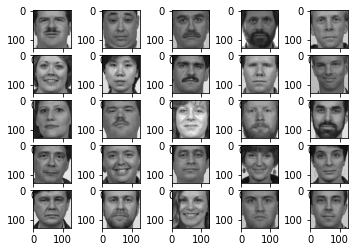

In [5]:
print("Train Images:")
train_images_names = os.listdir(Train_Img_Folder) # is a list
training_tensor = np.ndarray(shape=(len(train_images_names),height*width),dtype=np.float64) # shape(rows,columns)

for i in range(len(train_images_names)):
    img = plt.imread(Train_Img_Folder+'/'+train_images_names[i])
    training_tensor[i:] = np.array(img,dtype='float64').flatten()
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
plt.show()


Test Images:


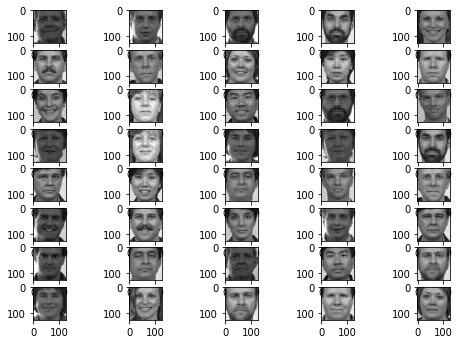

In [6]:
## Test Images
print('Test Images:')
test_image_names = os.listdir(Test_Img_Folder)#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = plt.imread(Test_Img_Folder+ '/' + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(8,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

## Calculating the Mean Face
Mean is just the sum of all pictures divided by the number of pics.

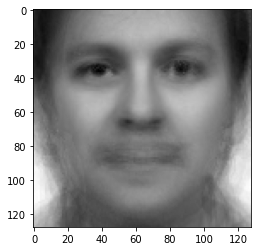

In [7]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_images_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.show()


## Calculating the difference between the Training Vector and the mean Vector

As we need to normalize the Training Set for PCA ..

Question Why do we need Normalization...

We need it as PCA uses the eigen Vector and maximizes in the direction of most variance .......

so if the data is not normalized it would tend to favour a big feature and remove other features that might be contributing to the dataset 

In [8]:
normalised_training_tensor = np.ndarray(shape=(len(train_images_names), height*width))

for i in range(len(train_images_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

## Display the normalized Images



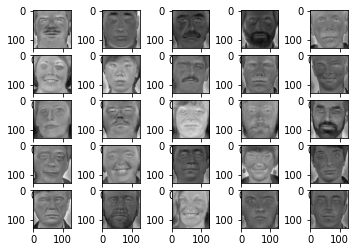

In [9]:
for i in range(len(normalised_training_tensor)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(5,5,1+i)
    plt.imshow(img,cmap="gray")

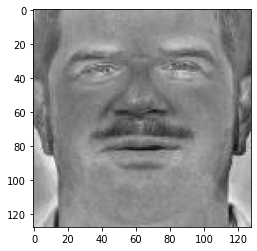

In [10]:
plt.imshow(normalised_training_tensor[0].reshape(height,width),"gray")

## Covarience Matrix 
This represents how the variables change together 

In [11]:
conv_matrix = np.cov(normalised_training_tensor) # Automatically calculates the A.t*A and other things

In [12]:
# Now making the conv_matrix equal
# conv_matrix = np.divide(conv_matrix,25.0)


In [13]:
## Remember the eigenvectors and the eigenvalues 

## Eigen vector of the conv_matrix

From the conv_matrix we can extract the eigen vectors and the eigen values.



In [14]:
eigenvalues, eigenvectors, = np.linalg.eig(conv_matrix)
print(eigenvalues)

[ 7.77343435e+03  3.57372226e+03  2.22126265e+03  1.65451043e+03
  1.36679653e+03  1.26703803e+03  1.10868773e+03  1.00403649e+03
  8.86121205e+02 -8.15423841e-13  7.50862095e+02  6.49563795e+02
  5.79558809e+02  5.68467467e+02  1.97795615e+02  2.13904067e+02
  2.39808841e+02  5.15711003e+02  4.84862680e+02  4.50476893e+02
  4.33900886e+02  3.03552212e+02  3.25220741e+02  3.70784688e+02
  3.52377037e+02]


In [15]:
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

sorted_ind = sorted(range(eigenvalues.shape[0]), key=lambda k: eigenvalues[k], reverse=True)

eigvalues_sort = eigenvalues[sorted_ind]
eigvectors_sort = eigenvectors[sorted_ind]
train_set_files_sort = np.array(train_set_files)[sorted_ind]

## Finding the Cumulative Variance of Each PCA

In [16]:
np.cumsum(eigvalues_sort)

array([ 7773.43434737, 11347.15661059, 13568.41925682, 15222.92968864,
       16589.72621379, 17856.76424008, 18965.45197004, 19969.48846138,
       20855.60966686, 21606.47176222, 22256.03555767, 22835.594367  ,
       23404.06183444, 23919.77283726, 24404.63551721, 24855.11241019,
       25289.01329579, 25659.79798357, 26012.17502022, 26337.39576138,
       26640.94797362, 26880.75681449, 27094.66088182, 27292.45649711,
       27292.45649711])

In [17]:
var_comp_sum = np.cumsum(eigvalues_sort)/np.sum(eigvalues_sort)
# if we have 5 pca then the variance is ?  this gives us that thing.

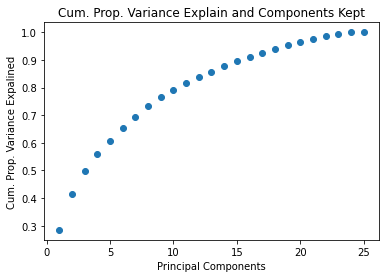

In [18]:
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Now taking the necessary PCA

In [19]:
reduced_data = np.array(eigvectors_sort[:25]).transpose()
print(training_tensor.shape)

(25, 16384)


## Calculating the Eigen Faces

Each EigenVector is multiplied by the whole Normalized Training Set matrix and thus , we will have the same amount of eigenFaces as images in our training Set.

In [20]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(25, 16384)

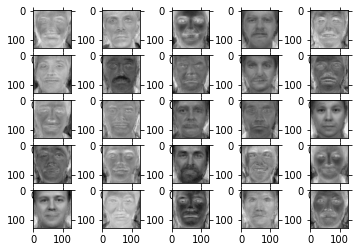

In [21]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

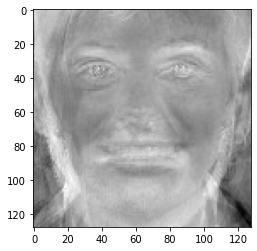

In [22]:
plt.imshow(proj_data[0].reshape(width,height),"gray")

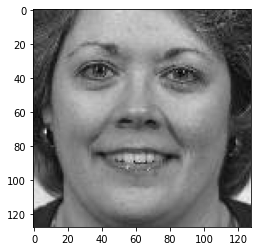

In [54]:
plt.imshow(training_tensor[5;].reshape(width,height),"gray")

## FInding the weights.


In [23]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
print(w.shape)

(25, 25)


In [24]:
def recogniser(test_image_names, train_images_names,proj_data,w, t0=2e8, prn=False):

    count        = 0
    num_images   = 0
    correct_pred = 0
    
    result = []
    wts = []
    
    #False match rate (FMR)
    FMR_count = 0
    
    #False non-match rate (FNMR)
    FNMR_count = 0
     

    test_image_names2 = sorted(test_image_names)

    for img in test_image_names2:

        unknown_face = plt.imread(Test_Img_Folder+'/'+img)
        num_images += 1
        
        unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
        normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

        w_unknown = np.dot(proj_data, normalised_uface_vector)
        diff  = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        index = np.argmin(norms)
        
        wts.append([count, norms[index]])

        if prn: print('Input:'+'.'.join(img.split('.')[:2]), end='\t')
        count+=1
        
        match = img.split('_')[0] == train_images_names[index].split('_')[0]
        if norms[index] < t0: # It's a face
            if match:
                if prn: print('Matched:' + train_images_names[index], end = '\t')
                correct_pred += 1
                result.append(1)
            else:
                if prn: print('F/Matched:'+train_images_names[index], end = '\t')
                result.append(0)
                FMR_count += 1
        
            if match:
                if prn: print('Unknown face!'+train_images_names[index], end = '\t')
                FNMR_count +=1
                
            else:
                pass
                correct_pred += 1



        if prn: print(norms[index], end=' ')
        if prn: print()
            
            
    
    FMR = FMR_count/num_images
    FNMR = FNMR_count/num_images
    
    
    print('Correct predictions: {}/{} = {} \t\t'.format(correct_pred, num_images, correct_pred/num_images), end=' ')
    print('FMR: {} \t'.format(FMR), end=' ')
    print('FNMR: {} \t'.format(FNMR))
    
    
    
    return wts, result, correct_pred, num_images, FMR, FNMR
    

wts, result, correct_pred, num_images, FMR, FNMR =recogniser(test_image_names, train_images_names,proj_data,w, t0=2e8, prn=True)

Input:00770_960530_fa.jpg	Matched:00770_960530_fa.jpg	Unknown face!00770_960530_fa.jpg	0.0 
Input:00770_960530_fa_a.jpg	F/Matched:00744_941201_fa.jpg	40443667.46730246 
Input:00771_941205_fa.jpg	Matched:00771_941205_fa.jpg	Unknown face!00771_941205_fa.jpg	0.0 
Input:00771_941205_fb.jpg	Matched:00771_941205_fa.jpg	Unknown face!00771_941205_fa.jpg	12411902.370116884 
Input:00772_941201_fa.jpg	Matched:00772_941201_fa.jpg	Unknown face!00772_941201_fa.jpg	0.0 
Input:00772_941201_fb.jpg	F/Matched:00763_941201_fa.jpg	21167349.7670407 
Input:00773_941201_fa.jpg	Matched:00773_941201_fa.jpg	Unknown face!00773_941201_fa.jpg	0.0 
Input:00773_941201_fb.jpg	Matched:00773_941201_fa.jpg	Unknown face!00773_941201_fa.jpg	21385298.893085327 
Input:00775_941205_fa.jpg	Matched:00775_941205_fa.jpg	Unknown face!00775_941205_fa.jpg	0.0 
Input:00775_941205_fb.jpg	Matched:00775_941205_fa.jpg	Unknown face!00775_941205_fa.jpg	9590985.44902739 
Input:00779_941205_fa.jpg	Matched:00779_941205_fa.jpg	Unknown face!007

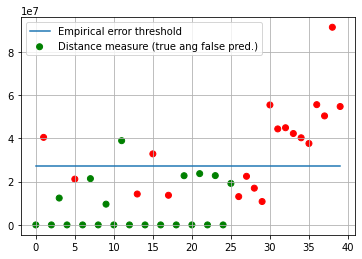

In [160]:
def rg(r):
    if r: return 'g'
    else: return 'r'
cl = [rg(r) for r in result]

x=[x[0] for x in wts]
y=[y[1] for y in wts]
plt.scatter(x,y, color=cl, label = 'Distance measure (true ang false pred.)')

x2=[x[0] for x in wts]
y2=[2.7e7 for y in wts]

plt.plot(x2,y2, label = 'Empirical error threshold')
plt.legend()
plt.grid()

plt.show()

In [25]:
count        = 0
num_images   = 0
correct_pred = 0
def Visualization(img, train_image_names,proj_data,w, t0):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread(Test_Img_Folder+'/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(40,2,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
   

    
    plt.subplot(40,2,1+count)
    if norms[index] < t0: # It's a face
            
        match = img.split('_')[0] == train_image_names[index].split('_')[0]
        #if img.split('.')[0] == train_image_names[index].split('.')[0]:
        if match:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
            plt.title('Matched:', color='g')
            plt.imshow(imread(Train_Img_Folder+'/'+train_image_names[index]), cmap='gray')
                
            correct_pred += 1
        else:
            #plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
            plt.title('False matched:', color='r')
            plt.imshow(imread(Train_Img_Folder+'/'+train_image_names[index]), cmap='gray')
    else:
        #if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
        if img.split('_')[0] not in [i.split('_')[0] for i in train_image_names]:
            plt.title('Unknown face', color='g')
            correct_pred += 1
        else:
            plt.title('Unknown face', color='r')
                
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
   
    count+=1

    
fig = plt.figure(figsize=(5, 30))

test_image_names2 = sorted(test_image_names)
for i in range(len(test_image_names2)):
    Visualization(test_image_names2[i], train_image_names,proj_data,w, t0=2.7e7)

plt.show()

NameError: name 'train_image_names' is not defined